In [6]:
-

In [2]:
unet = load_model('unet2.keras')
target_size=unet.input.__dict__['_keras_shape'][1:-1]
bsds = BSDS500(target_size=target_size, masks_to_binary=False)
ids, cnts, sgmtns, images = bsds.get_val()

/home/i008/BSR


In [3]:
preds = unet.predict(images[:])
preds = preds[:, :, :, 0]
cnts_1d = cnts[:,:,0]
images_uint8 = (images*255).round().astype('uint8')

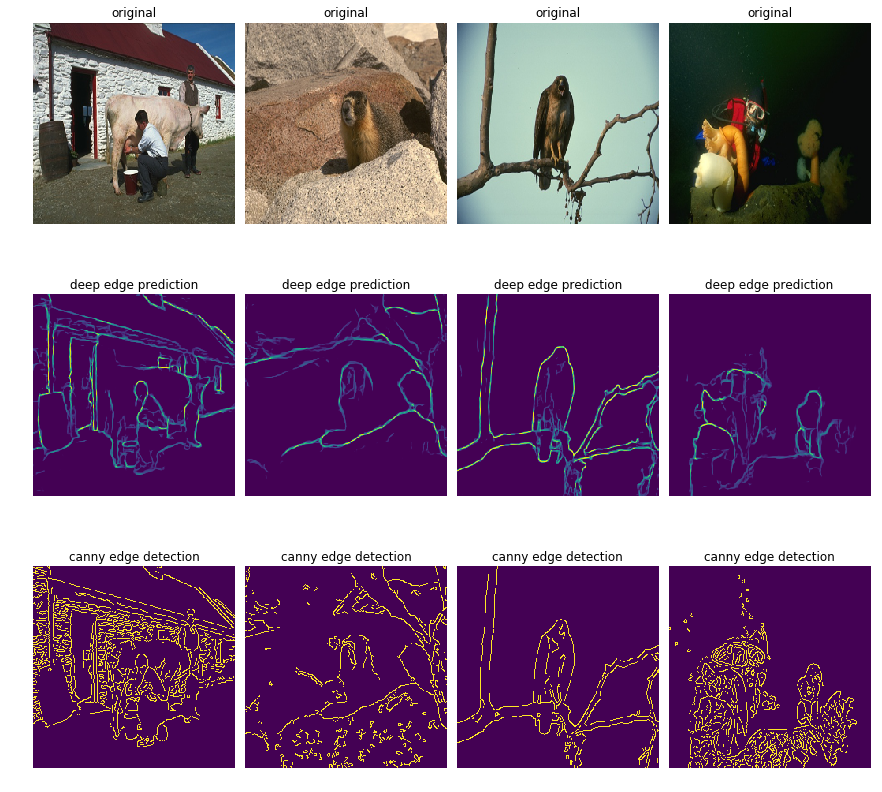

In [17]:
f, axarr = plt.subplots(3, 4, figsize=(15,15))
for i, (original, pred, blurr) in enumerate(list(zip(images, preds, images_uint8))[410:450:10]):
    blurr = blurr_canny(blurr)
    
    orig_row = axarr[0, i]
    orig_row.imshow(original)
    orig_row.axis('off')
  
    pred_row = axarr[1, i]
    pred_row.imshow(pred)
    pred_row.axis('off')
    
    canny_row = axarr[2, i]
    canny_row.imshow(blurr)
    canny_row.axis('off')
    
    orig_row.set_title('original')
    pred_row.set_title('deep edge prediction')
    canny_row.set_title('canny edge detection')

    plt.subplots_adjust(hspace=0, wspace=0.05)

(-0.5, 255.5, 255.5, -0.5)

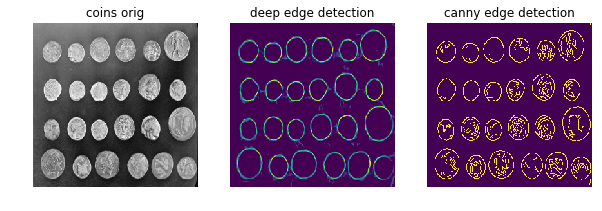

In [9]:
plt.figure(figsize=(10,10))
p, c = predict_custom_image(image=coins.astype(float), model=unet)


plt.subplot(131)
plt.axis('off')

plt.imshow(resize(coins, (256,256)), cmap='gray')
plt.title('coins orig')
plt.subplot(132)
plt.axis('off')

plt.title('deep edge detection')
plt.imshow(p)
plt.subplot(133)
plt.axis('off')

plt.title('canny edge detection')
plt.imshow(c)

plt.axis('off')

In [137]:
p, c = predict_custom_image('paper.JPG', model=unet)

In [10]:
p, c = predict_custom_image('164461_Viator_Shutterstock_123713.jpg', model=unet)

In [7]:
p, c = predict_custom_image('IMG_20160929_132938.jpg', model=unet)

(-0.5, 255.5, 255.5, -0.5)

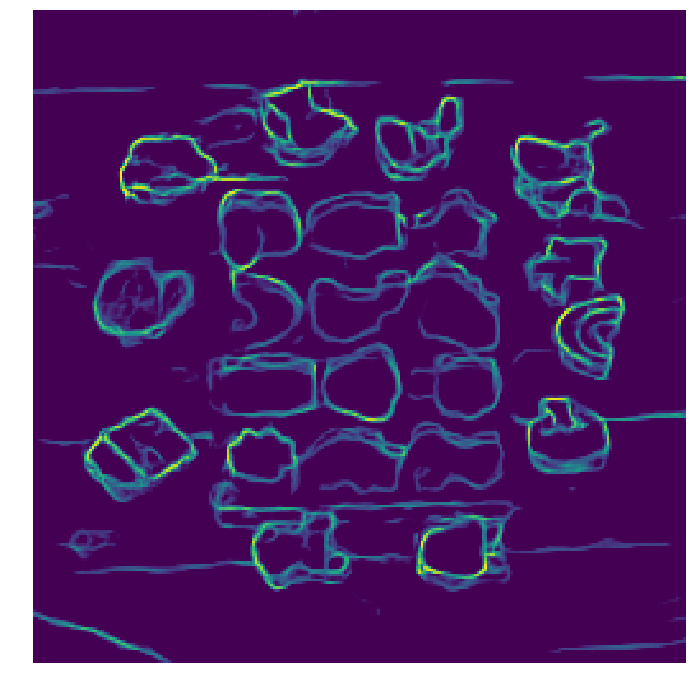

In [13]:
plt.figure(figsize=(12,12))
plt.imshow(p)
plt.axis('off')